In [245]:
# include any imports you'll need here!
import random 
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import pandas as pd

# Problem 1 

## a)

Again create an Erdös-Rényi (ER) network with 500 arrows and 400 nodes, this time saving the information as a list of lists, where the inner lists specify the two nodes that are connected by each arrow. This list should look something like this, with a total of 500 entries: 

`[ [35, 234], [264, 67], . . . , [89, 122] ]` 

In [246]:
def ER_network(arrows, nodes):
"""randomly generates ER networks"""
    
    #initialize an array of zeros
    arrow_pairs = np.zeros((arrows, 2), dtype=int)
    
    for i in range(arrows):
        new_pair = random.choices(range(nodes), k=2)
        arrow_pairs[i] = new_pair
        
        
    return arrow_pairs

In [247]:
ER_network(500, 400)[:10]

array([[317, 158],
       [273, 123],
       [154, 157],
       [201, 197],
       [151, 290],
       [250, 306],
       [349, 164],
       [224, 339],
       [134, 321],
       [ 12,  59]])

## b)

Using this lists of lists you have saved, write a function that will count the number of feedforward loops in this ER network. The approach here is up to you although you can ask me for suggestions! Make sure to document / comment your code clearly to explain your approach. Again compare your results to the real network shown in Figure 3.3, where there are a total of 42 feedforward loops.

In [248]:
def FFLs(arrows, nodes):
"""Counts feedforward loops in a randomly genrated ER network that was 
based on a given number of arrows and nodes"""

# could do this faster by eliminating all non-duplicates firsted
    
    #build a random ER network base on the ER_network funciton
    pairs = ER_network(arrows, nodes)
    # initialize an empty list of feedforward loops
    loops = []

    #convert nested list of arrows to a data from of senting and reciving nodes
    df = pd.DataFrame(pairs, columns = ['sent', 'recived'])

    #iterate through all possible nodes
    for X in range(nodes):
        #find possible X --> Y but avoid duplicate nodes
        Ys = df[(df["sent"] == X) & (df["recived"] != X)]["recived"]
        
        for  Y in Ys:
            # find Y--> Z but avoid duplicate notes
            Zs = df[(df["sent"] == Y) & (df["recived"] != Y) & (df["recived"] != X)]["recived"]
            
            for Z in Zs:
                #checking if X--> Z to know if its a true FFL
                if Z in Ys:
                    loops.append([X,Y,Z])                
        
    return len(loops), loops
    

In [249]:
FFLs(500, 400)

(2, [[190, 172, 88], [293, 224, 363]])

My network had far fewer than 42 feedforward loops described in the real figure 3.3 network. I had only 2 feedforward loops, suggesting that feedforwrd loops are a true motif.

# Problem 2

As a continuation of our work on Monday and Wednesday, use numerical integration to re-create the figure from the text book for a C1-FFL:

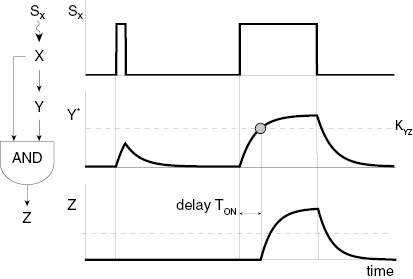

## a)

First specify the values of X over time, with a short pulse and a long pulse built in. Plot your resulting array to make sure that you've encoded this information correctly, and that it looks similar to the top panel of the figure.

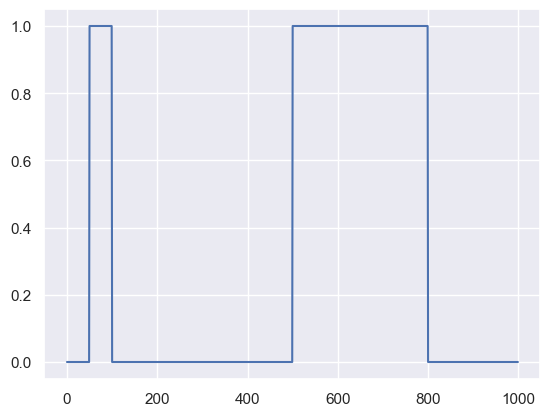

In [252]:
X = np.zeros(1000)
X[50:100] = 1
X[500:800] = 1

t = np.arange(len(X))
plt.plot(t,X, label = "X")

## b)

Next use the differential equations below to numerically integrate the behavior for $Y$ and $Z$ in response to the array of $X$ values you set up in part a).

$$ \frac{dY}{dt} = \beta_Y \frac{X^n}{K_{XY}^n + X^n} - \alpha_Y Y $$

$$ \frac{dZ}{dt} = \beta_Z \frac{X^n}{K_{XZ}^n + X^n} \frac{Y^n}{K_{YZ}^n + Y^n} - \alpha_Z Z $$

Euler integration is fine here, as long as you select an appropriate value of $\Delta t$. However as a challenge, you can also try to integrate this with `scipy`, although this is quite a bit trickier since there is not only a time array, but also the array of $X$ values upon which $Y$ and $Z$ depend. 

For an example of how to integrate more than one differential equation at a time, you can check out my previous lecture notes here:

https://sbeeler.github.io/BIOL301_Fall2022/04_scipy_integration.html

These notes address how you might integrate $Y$ and $Z$ concurrently, but they don't address how you would incorporate the dependence on the $X$ array. So if you want to take this approach, you will still have to figure that piece out.

In [253]:
#could use scipy

Text(0, 0.5, 'Value of X, Y, and Z Prime')

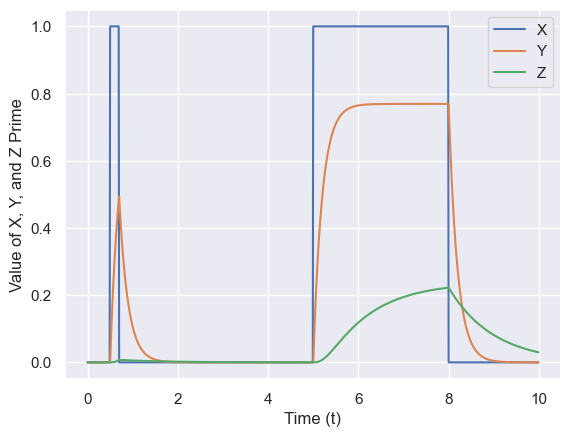

In [255]:
X = np.zeros(1000)
Y = np.zeros(1000)
Z = np.zeros(1000)

dt = 0.01 # min
t = np.arange(len(X))*dt

#Initialize n
n = 2 

#Initialize params for X
Beta_X = 1 #Max production of X per min

#Initialize params for Y
Beta_Y = 100 #Max production of Y per min 
alpha_Y = 5 #degredation of Y per transcript per min
K_XY = 5 #Binding affinity for X binding to Y 

#Initialize params for Z
Beta_Z = 1000 #Max production of Z per min
alpha_Z = 1 #degredation of Z per transcript per min
K_XZ = 7 #Binding affinity for X binding to Z 
K_YZ = 7 #Binding affinity for Y binding to Z 

#Plot X

X[50:70] = Beta_X
X[500:800] = Beta_X
plt.plot(t,X, label = "X")


#Plot Y
for t in range(len(Y)-1):
    dY =  Beta_Y*(X[t]**n) / (K_XY**n + X[t]**n) - alpha_Y* Y[t]
    Y[t+1] = Y[t] + dY*dt
    
t = np.arange(len(Y))*dt   
plt.plot(t, Y, label = "Y")

#Plot Z
for t in range(len(X)-1):
    dZ = Beta_Z* ((X[t]**n) / (K_XZ **n + X[t]**n)) * ((Y[t]**n) / (K_YZ**n + Y[t]**n)) - alpha_Z * Z[t]
    Z[t+1] = Z[t] + dZ*dt
    
t = np.arange(len(Z))*dt   
plt.plot(t, Z, label = "Z")

#Label graph

plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Value of X, Y, and Z Prime")

# Problem 3

Repeat your analysis for Problem 2, this time for the I1-FFL. Recreate the results below, including demonstrating that this feedforward loop responds more quickly than simple regulation. Make sure both plots have the same steady state so that they are comparable. (There's no need to mark the $T_{1/2}$ values, just the two plots are sufficient here.)

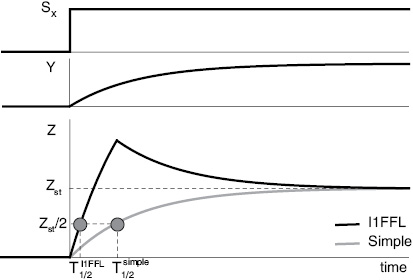

## a)

First define the system of equations below. Explain the way(s) in which the mathematical formulation differs from the C1-FFL.

$$ \frac{dY}{dt} = \beta_Y \frac{X^n}{K_{XY}^n + X^n} - \alpha_Y Y $$$$

$$ \frac{dZ}{dt} = \beta_Z \frac{X^n}{K_{XZ}^n + X^n} \frac{K_{YZ}}{Y^n + K_{YZ}^n} - \alpha_Z Z $$

The difference between the specific coharent 1 and incohernet 1 feedforward loops being looked at here is whether the absance of Y is needed for Z production or the presence of Y is needed for Z production. For questison 2 in the C1 FFL, we needed Y for Z production. In quesiton, 3 to modify our mathmatical formula to account for the absance of Y being nessaccary in the I1 FFL, we replaced the Y^n on top of the fraction with K_yz.

## b)

Conduct your integration and display your results below.

Text(0, 0.5, 'Value of X, Y, and Z Prime in Comparision with Simple Regulation')

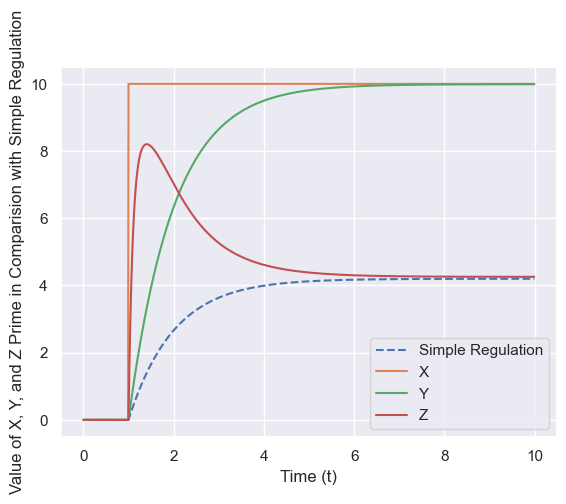

In [258]:
X = np.zeros(1000)
Y = np.zeros(1000)
Z = np.zeros(1000)

dt = 0.01 # min
t = np.arange(len(X))*dt

#Initialize n
n = 3 

#simple regulation params
Beta = 4.2 # per min 
alpha = 1 # per transcript per min
K = 5 # per cell 

#Initialize params for X
Beta_X = 10 #Max production of X per min

#Initialize params for Y
Beta_Y = 10 #Max production of Y per min 
alpha_Y = 1 #degredation of Y per transcript per min
K_XY = 1 #Binding affinity for X binding to Y 

#Initialize params for Z
Beta_Z = 170 #Max production of Z per min
alpha_Z = 10 #degredation of Z per transcript per min
K_XZ = 10 #Binding affinity for X binding to Z 
K_YZ = 10 #Binding affinity for Y binding to Z 




#Plot simple regulation
S = np.zeros(1000)
dt = 0.01 # min

for t in range(100, len(S)-1):
    dX = Beta - alpha * S[t]
    S[t+1] = S[t] + dX*dt

t = np.arange(len(S))*dt 
plt.plot(t, S, label = "Simple Regulation", linestyle = "dashed")

#Plot X

X[100:1000] = Beta_X
plt.plot(t,X, label = "X")


#Plot Y
for t in range(len(Y)-1):
    dY =  Beta_Y*(X[t]**n) / (K_XY**n + X[t]**n) - alpha_Y* Y[t]
    Y[t+1] = Y[t] + dY*dt
    
t = np.arange(len(Y))*dt   
plt.plot(t, Y, label = "Y")

#Plot Z
for t in range(len(X)-1):
    dZ = Beta_Z* ((X[t]**n) / (K_XZ **n + X[t]**n)) * ((K_YZ**n) / (K_YZ**n + Y[t]**n)) - alpha_Z * Z[t]
    Z[t+1] = Z[t] + dZ*dt
    
t = np.arange(len(Z))*dt   
plt.plot(t, Z, label = "Z")

#Label graph

plt.legend()
plt.xlabel("Time (t)")
plt.ylabel("Value of X, Y, and Z Prime in Comparision with Simple Regulation")